In [9]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 날짜 수 계산 함수
def calculate_days(date_range):
    start_date, end_date = date_range.split('~')
    start_date = datetime.strptime(start_date, "%d")
    end_date = datetime.strptime(end_date, "%d")
    return (end_date - start_date).days + 1

data = pd.read_csv("export_20240411.csv", dtype={'연': str, '월': str, '일': str})
data['time'] = data['연'] + '-' + data['월']

# 'days' 컬럼 추가
data['days'] = data['일'].apply(calculate_days)
data['일평균'] = data['금액'] / data['days']

# 'time' 컬럼을 datetime으로 변환
data['time'] = pd.to_datetime(data['time'], format='%Y-%m')

# print(data)

all = data[data['품목'] == '전체']
semi = data[data['품목'] == '반도체']

# 각 그룹에서 'days'가 가장 큰 행만 남깁니다.
all_max_days = all.groupby(all.time)['days'].idxmax()
semi_max_days = semi.groupby(semi.time)['days'].idxmax()

# 'days'가 가장 큰 행만 필터링
filtered_all = all.loc[all_max_days]
filtered_semi = semi.loc[semi_max_days]
filtered_all


,연,월,일,품목,금액,time,days,일평균
22,2019,04,01~30,전체,48781156,2019-04-01,30,1.626039e+06
55,2019,05,01~31,전체,45703948,2019-05-01,31,1.474321e+06
88,2019,06,01~30,전체,44008404,2019-06-01,30,1.466947e+06
121,2019,07,01~31,전체,46078221,2019-07-01,31,1.486394e+06
154,2019,08,01~31,전체,44020065,2019-08-01,31,1.420002e+06
...,...,...,...,...,...,...,...,...
1870,2023,12,01~31,전체,57573193,2023-12-01,31,1.857200e+06
1903,2024,01,01~31,전체,54771268,2024-01-01,31,1.766815e+06
1936,2024,02,01~29,전체,52423042,2024-02-01,29,1.807691e+06
1969,2024,03,01~31,전체,56571841,2024-03-01,31,1.824898e+06


In [10]:
# '품목'이 '전체'인 데이터만 필터링
data = filtered_all[filtered_all['품목'] == '전체']
data['avg'] = scaler.fit_transform(data[['일평균']])
data['avg-12'] = data['avg'].shift(12)
data['avgyoy'] = data['avg'] - data['avg-12'] + 0.5
data = data.set_index('time')
data = data.sort_index()
data

,연,월,일,품목,금액,days,일평균,avg,avg-12,avgyoy
time,,,,,,,,,,
2019-04-01,2019,04,01~30,전체,48781156,30,1.626039e+06,0.537554,NaN,NaN
2019-05-01,2019,05,01~31,전체,45703948,31,1.474321e+06,0.374994,NaN,NaN
2019-06-01,2019,06,01~30,전체,44008404,30,1.466947e+06,0.367093,NaN,NaN
2019-07-01,2019,07,01~31,전체,46078221,31,1.486394e+06,0.387930,NaN,NaN
2019-08-01,2019,08,01~31,전체,44020065,31,1.420002e+06,0.316793,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-01,2023,12,01~31,전체,57573193,31,1.857200e+06,0.785235,0.691066,0.594169
2024-01-01,2024,01,01~31,전체,54771268,31,1.766815e+06,0.688391,0.396948,0.791443
2024-02-01,2024,02,01~29,전체,52423042,29,1.807691e+06,0.732188,0.708434,0.523754


In [11]:

# '품목'이 '반도체'인 데이터만 필터링
semi = filtered_semi[filtered_semi['품목'] == '반도체']
semi['avg'] = scaler.fit_transform(semi[['일평균']])
semi['avg-12'] = semi['avg'].shift(12)
semi['avgyoy'] = semi['avg'] - semi['avg-12'] + 0.5
semi = semi.set_index('time')
semi = semi.sort_index()
semi

,연,월,일,품목,금액,days,일평균,avg,avg-12,avgyoy
time,,,,,,,,,,
2019-04-01,2019,04,01~30,반도체,8674532,30,289151.066667,0.386255,NaN,NaN
2019-05-01,2019,05,01~31,반도체,7788508,31,251242.193548,0.219832,NaN,NaN
2019-06-01,2019,06,01~30,반도체,8509573,30,283652.433333,0.362116,NaN,NaN
2019-07-01,2019,07,01~31,반도체,7692400,31,248141.935484,0.206222,NaN,NaN
2019-08-01,2019,08,01~31,반도체,8190041,31,264194.870968,0.276695,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-01,2023,12,01~31,반도체,11192340,31,361043.225806,0.701867,0.448290,0.753577
2024-01-01,2024,01,01~31,반도체,9529948,31,307417.677419,0.466447,0.000000,0.966447
2024-02-01,2024,02,01~29,반도체,10051061,29,346588.310345,0.638409,0.083809,1.054599


In [12]:
data2 = pd.read_csv("index20240415.csv" , dtype={'시점': str})
data2['time'] = pd.to_datetime(data2['시점'], format='%Y.%m')
data2 = data2.set_index('time')
data2['avg'] = scaler.fit_transform(data2[['수출경기']])
data2 = data2.loc[data.index[0]:]
data2

,시점,항목,수출경기,수입경기,avg
time,,,,,
2019-04-01,2019.04,확산지수,31.1,40.7,0.249663
2019-05-01,2019.05,확산지수,58.5,70.7,0.619433
2019-06-01,2019.06,확산지수,30.7,38.3,0.244265
2019-07-01,2019.07,확산지수,47.8,44.9,0.475034
2019-08-01,2019.08,확산지수,38.9,48.8,0.354926
2019-09-01,2019.09,확산지수,52.6,51.5,0.539811
2019-10-01,2019.10,확산지수,44.1,29.9,0.425101
2019-11-01,2019.11,확산지수,41.1,43.4,0.384615
2019-12-01,2019.12,확산지수,59.6,62.0,0.634278


In [13]:
import yfinance as yf

df = yf.Ticker('KRWUSD=X').history(period='10y', interval='1d')[['Open', 'High', 'Low', 'Close', 'Volume']]
df = df.reset_index()

df.columns = ['time','open','high','low','close','volume']
df['time'] = df['time'].dt.strftime('%Y-%m-%d')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')
df = df.set_index('time')
df = df.sort_index()
# 2016-1-1이후 데이터
df = df.loc[data.index[0]:]
df['avg'] = scaler.fit_transform(df[['close']])
df

,open,high,low,close,volume,avg
time,,,,,,
2019-04-01,0.000880,0.000885,0.000880,0.000880,0,0.813057
2019-04-02,0.000883,0.000884,0.000878,0.000883,0,0.826652
2019-04-03,0.000880,0.000884,0.000879,0.000880,0,0.814100
2019-04-04,0.000882,0.000883,0.000878,0.000882,0,0.823743
2019-04-05,0.000880,0.000882,0.000878,0.000882,0,0.821142
...,...,...,...,...,...,...
2024-04-09,0.000738,0.000741,0.000737,0.000738,0,0.199323
2024-04-10,0.000742,0.000754,0.000733,0.000742,0,0.212832
2024-04-11,0.000733,0.000736,0.000729,0.000733,0,0.176887


In [14]:
data['ma'] = data['avg'].rolling(window=3).mean()
data['ma-12'] = data['avg-12'].rolling(window=3).mean()
data['mayoy'] = data['avgyoy'].rolling(window=3).mean()
data2['ma'] = data2['avg'].rolling(window=3).mean()
df['ma'] = df['avg'].rolling(window=3).mean()

In [15]:
semi['ma'] = semi['avg'].rolling(window=3).mean()
semi['ma-12'] = semi['avg-12'].rolling(window=3).mean()
semi['mayoy'] = semi['avgyoy'].rolling(window=3).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


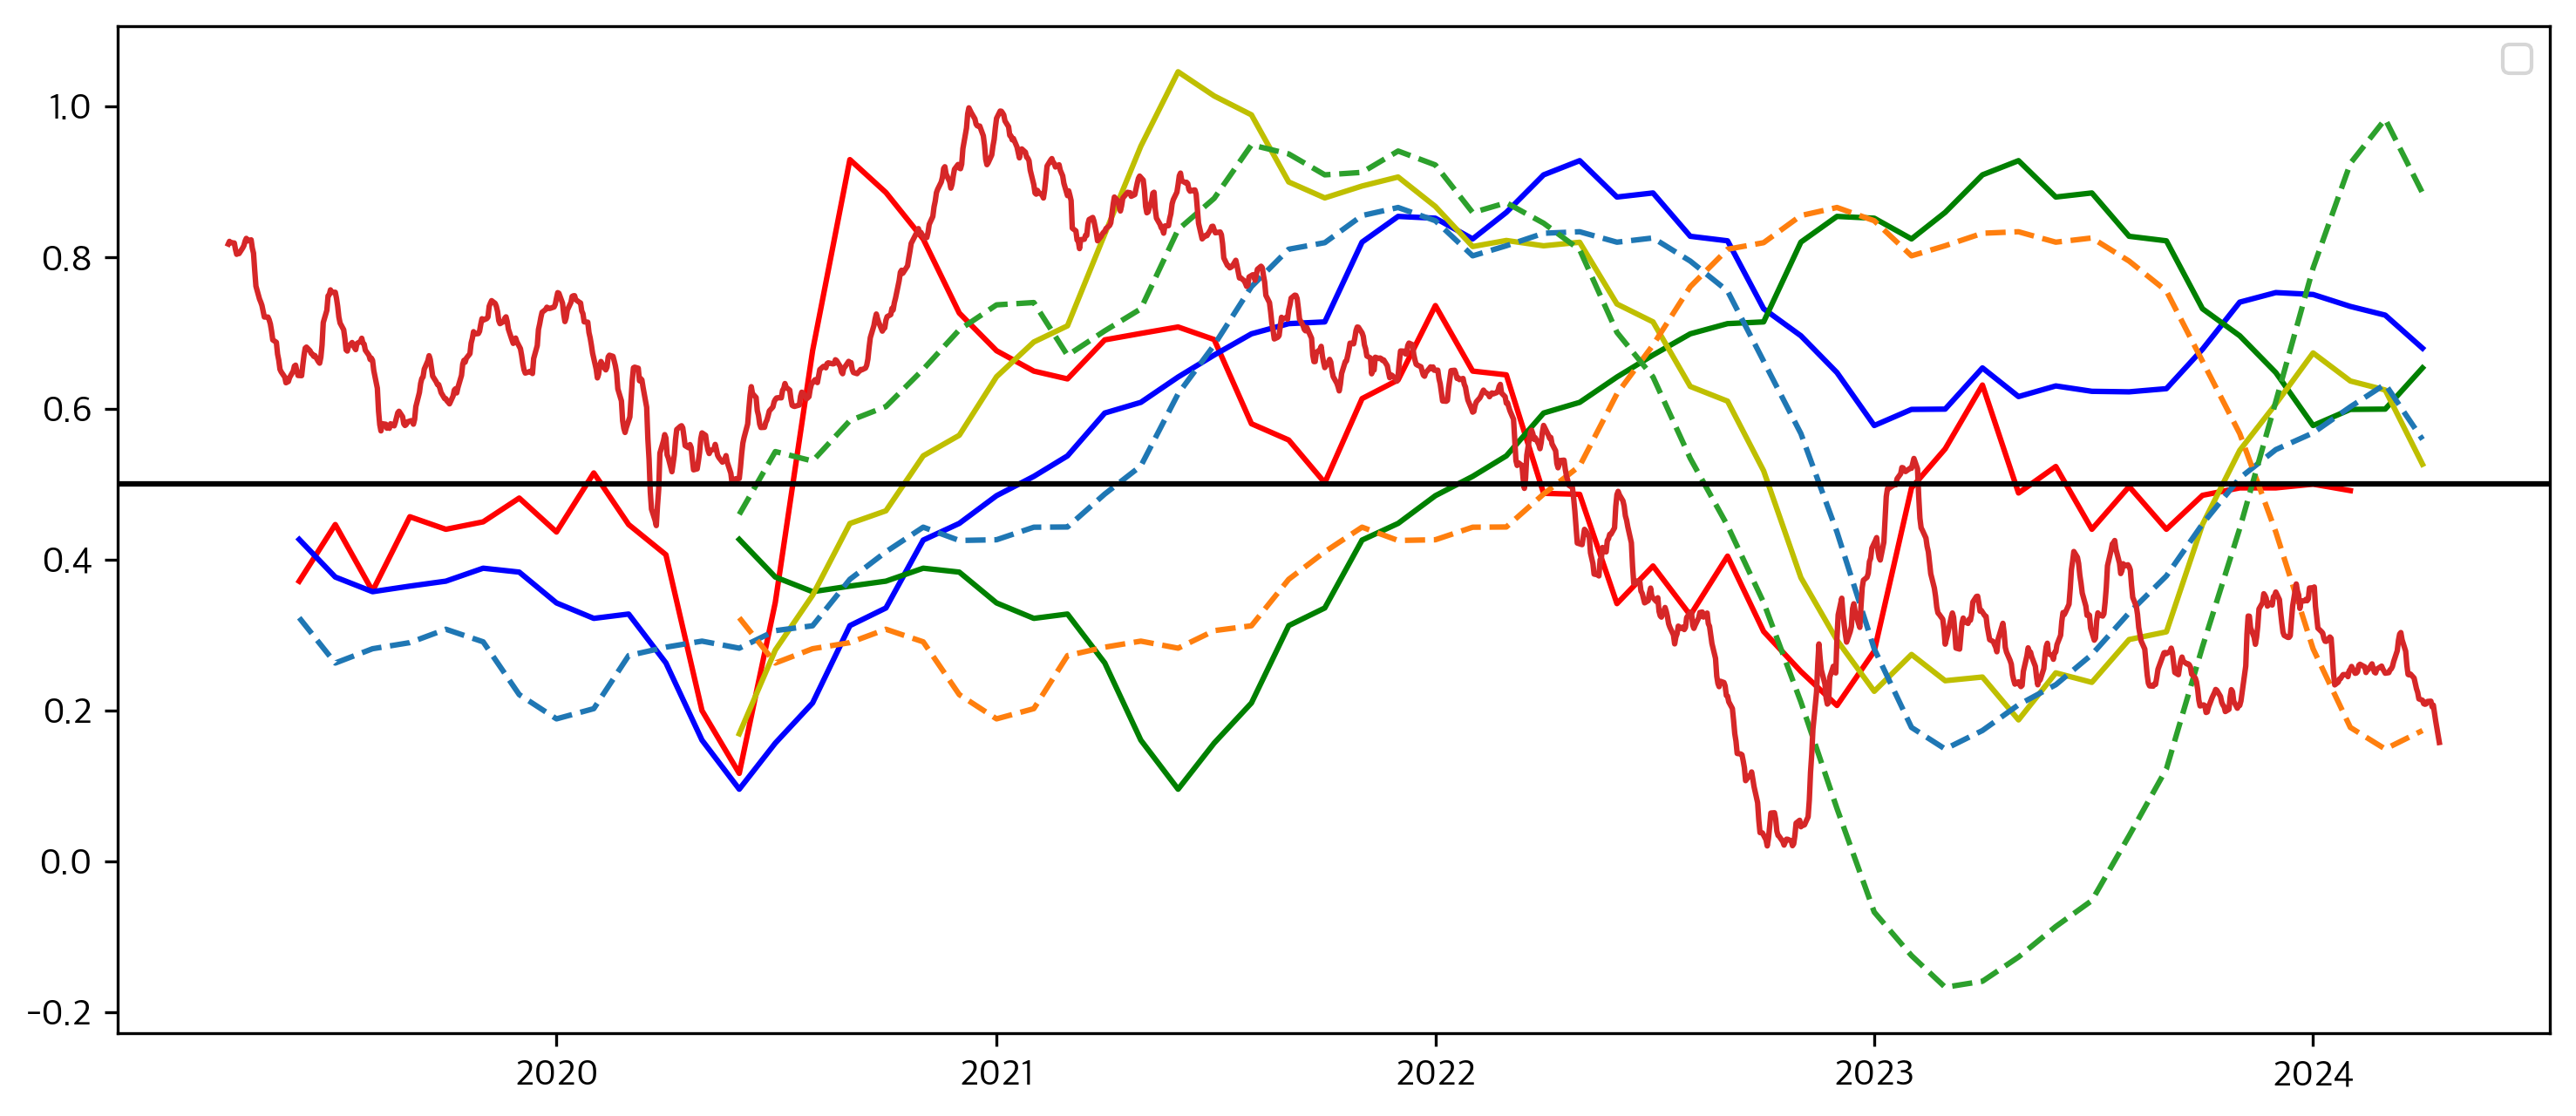

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(data2['ma'], color='r')
plt.plot(data['ma'], color='b')
plt.plot(data['ma-12'], color='g')
plt.plot(data['mayoy'], color='y')
plt.plot(semi['ma'], linestyle='dashed')
plt.plot(semi['ma-12'], linestyle='dashed')
plt.plot(semi['mayoy'], linestyle='dashed')
plt.plot(df['ma'])
plt.axhline(y=0.5, color='k', linestyle='-')
# plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()